In [1]:
pip install numpy 

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas 


Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install matplotlib 


Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [8]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

In [10]:
df = pd.read_csv("StudentDataset.csv") 
print(df.head())

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

In [11]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [13]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [14]:
df = df.drop("Unnamed: 0",axis =1)

In [77]:
df["WklyStudyHours"] = df["WklyStudyHours"].str.replace("5 - 12","5 - 10")
df.head() 

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


# Gender Distribution

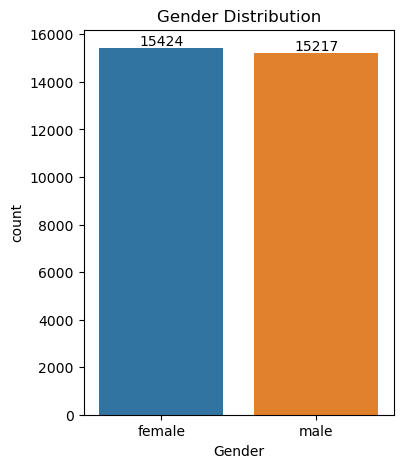

In [78]:
    plt.figure(figsize=(4,5))
    ax = sns.countplot(data = df , x = "Gender")
    ax.bar_label(ax.containers[0])
    plt.title("Gender Distribution")
    plt.show() 

In [36]:
#From Above chart we have analysed that:
#the number of females is more than number of males in the dataset 

# Parents Educational Impact

In [30]:
gb = df.groupby("ParentEduc").agg({"MathScore" :'mean' , "ReadingScore" : 'mean' , "WritingScore" : 'mean'})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


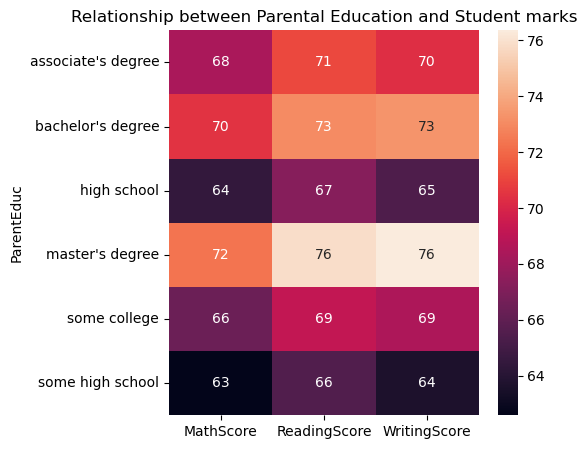

In [51]:
plt.figure(figsize = (5,5))
sns.heatmap(gb , annot = True)
plt.title("Relationship between Parental Education and Student marks")
plt.show()

In [35]:
#From the above heatmap we analyzed that :
#Those students whose parents have higher education(Masters Degree) have avg marks greater that other students &
#Students who have parents with less education(high school) have lesser avg marks

# Parental Marital Status

In [37]:
mgb = df.groupby("ParentMaritalStatus").agg({"MathScore" : 'mean' , "ReadingScore":'mean' , "WritingScore":'mean'})

In [40]:
print(mgb)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


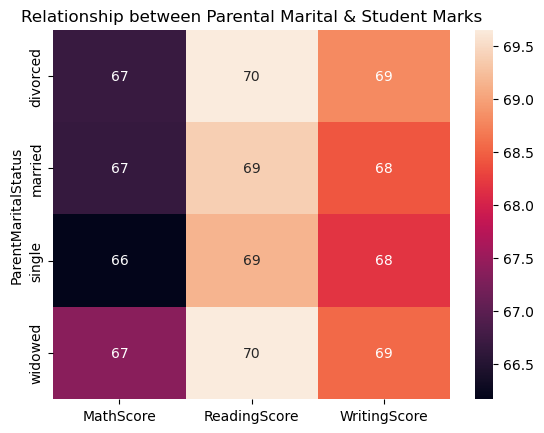

In [50]:
sns.heatmap(mgb , annot=True)
plt.title("Relationship between Parental Marital & Student Marks")
plt.show()

In [43]:
#From above heatmap we have analyzed that :
#There is negligible influence of Parental Marital Status on Students Marks .

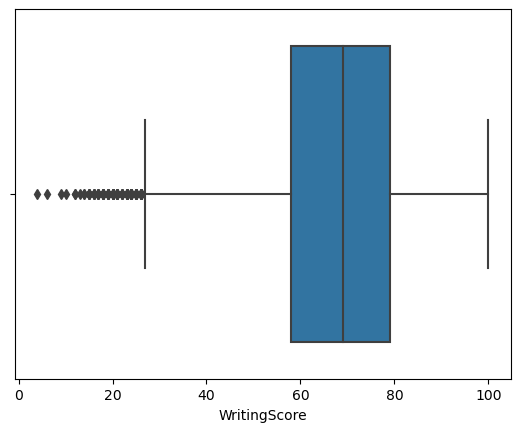

In [52]:
sns.boxplot(data = df, x = "WritingScore")
plt.show()

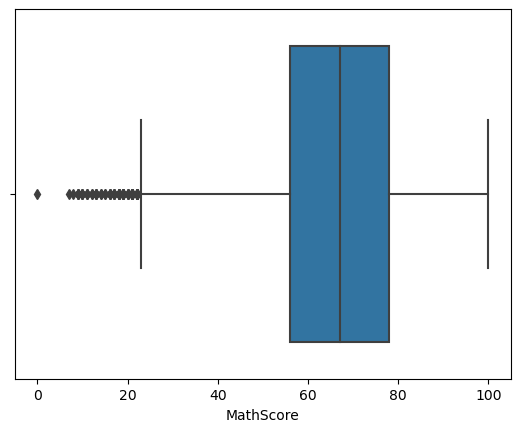

In [53]:
sns.boxplot(data = df, x = "MathScore")
plt.show()

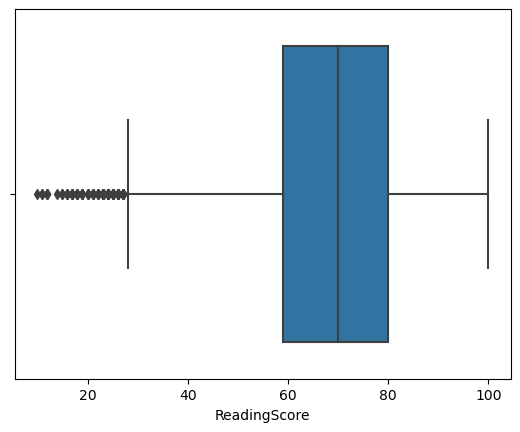

In [54]:
sns.boxplot(data = df, x = "ReadingScore")
plt.show()

In [55]:
print(df["EthnicGroup"].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


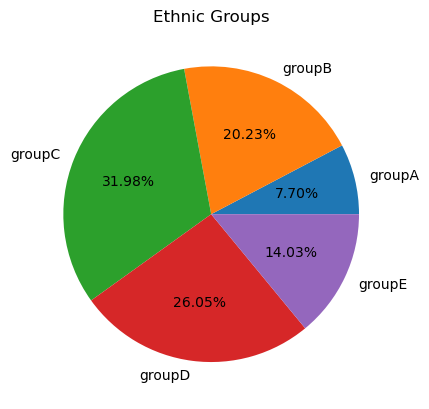

In [64]:
groupA = df.loc[(df["EthnicGroup"]== "group A" )].count()
groupB = df.loc[(df["EthnicGroup"] == "group B")].count()
groupC = df.loc[(df["EthnicGroup"] == "group C")].count()
groupD = df.loc[(df["EthnicGroup"] == "group D")].count()
groupE = df.loc[(df["EthnicGroup"] == "group E")].count()

l=["groupA" ,"groupB" , "groupC" , "groupD" , "groupE" ]
mlist = [groupA["EthnicGroup"],groupB["EthnicGroup"] , groupC["EthnicGroup"] , groupD["EthnicGroup"] , groupE["EthnicGroup"]]
plt.pie(mlist , labels = l , autopct = "%1.2f%%")
plt.title("Ethnic Groups")
plt.show()


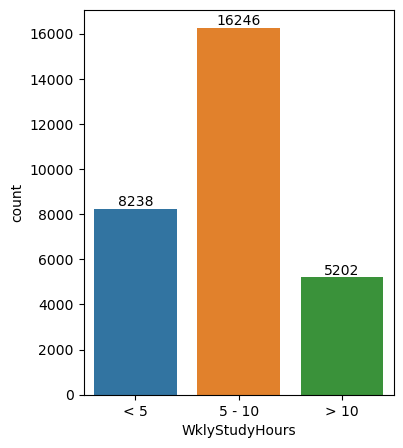

In [80]:
    plt.figure(figsize=(4,5))
    a = sns.countplot(data = df , x = "WklyStudyHours")
    a.bar_label(a.containers[0])
   
    plt.show() 

In [130]:
df = pd.read_csv("StudentDataset.csv")
df["WklyStudyHours"] = df["WklyStudyHours"].str.replace("5 - 10","7")
df["WklyStudyHours"] = df["WklyStudyHours"].str.replace("< 5","4")
df["WklyStudyHours"] = df["WklyStudyHours"].str.replace("> 10","11")
df['WklyStudyHours'] = pd.to_numeric(df['WklyStudyHours'], errors='coerce')


df['MathScore'] = pd.to_numeric(df['MathScore'], errors='coerce')

df.head() 

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,4.0,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,7.0,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,4.0,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,7.0,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,7.0,76,78,75


In [131]:

df.head()


,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,4.0,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,7.0,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,4.0,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,7.0,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,7.0,76,78,75


In [132]:
conditions = [
    (df['WklyStudyHours'] < 5 ),
    (df['WklyStudyHours'] >= 5) & (df['WklyStudyHours'] <= 10),
    (df['WklyStudyHours'] > 10)
]

categories = ['<5 hours', '5-10 hours', '>10 hours']
df['Study_Hours_Category'] = pd.cut(df['WklyStudyHours'], bins=[-float('inf'), 5, 10, float('inf')], labels=categories)


In [140]:
avg_scores_MathScore = df.groupby('Study_Hours_Category')['MathScore'].mean()


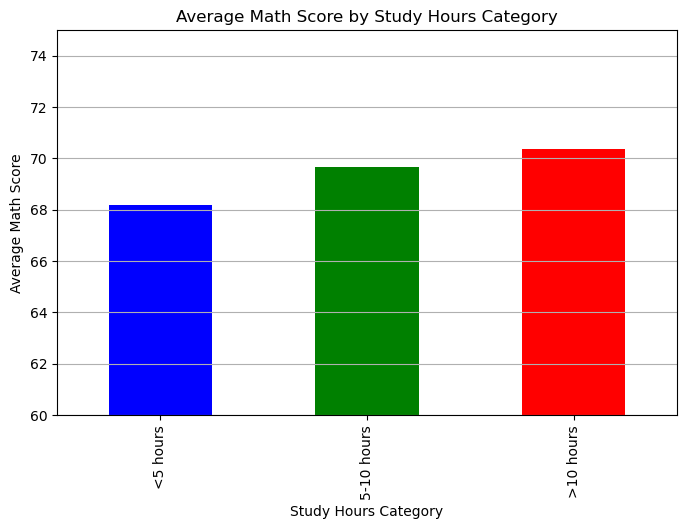

In [152]:
plt.figure(figsize=(8, 5))
avg_scores_MathScore.plot(kind='bar', color=['blue', 'green', 'red'])

# Adding titles and labels
plt.title('Average Math Score by Study Hours Category')
plt.xlabel('Study Hours Category')
plt.ylabel('Average Math Score')
plt.ylim(60, 75)  # Adjust the upper limit based on your data range

# Show the plot
plt.grid(axis='y')


plt.show()

In [145]:
avg_scores_ReadScore = df.groupby('Study_Hours_Category')['ReadingScore'].mean()

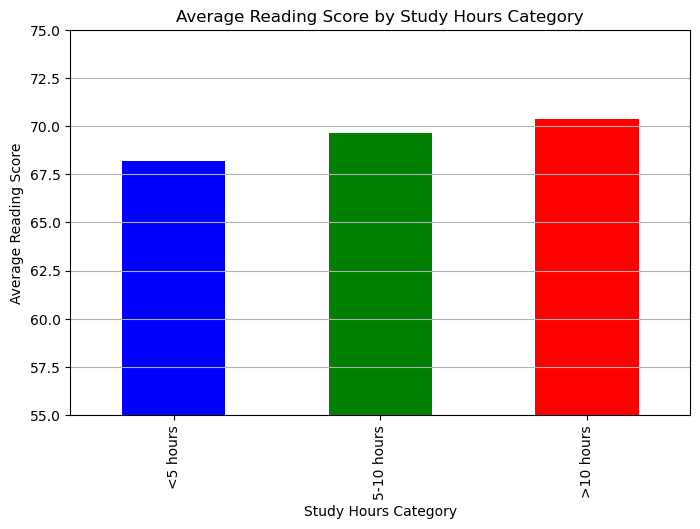

In [165]:
plt.figure(figsize=(8, 5))
avg_scores_ReadScore.plot(kind='bar', color=['blue', 'green', 'red'])

# Adding titles and labels
plt.title('Average Reading Score by Study Hours Category')
plt.xlabel('Study Hours Category')
plt.ylabel('Average Reading Score')
plt.ylim(55, 75)  # Adjust the upper limit based on your data range

# Show the plot
plt.grid(axis='y')


plt.show()

In [156]:
avg_scores_WriteScore = df.groupby('Study_Hours_Category')['WritingScore'].mean()

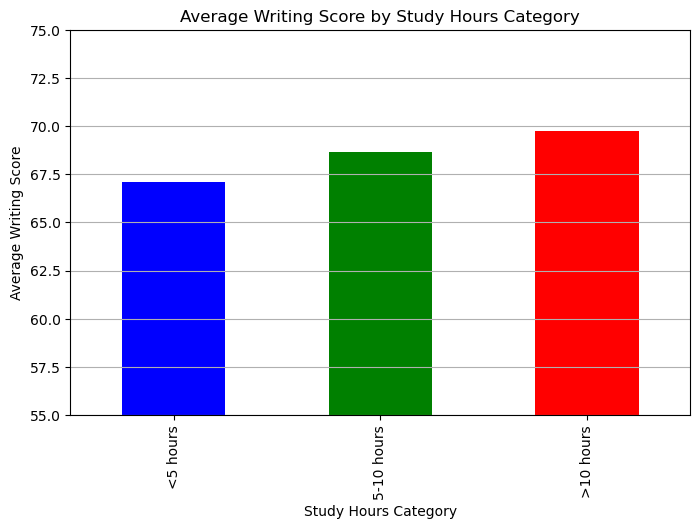

In [163]:
plt.figure(figsize=(8, 5))
avg_scores_WriteScore.plot(kind='bar', color=['blue', 'green', 'red'])

# Adding titles and labels
plt.title('Average Writing Score by Study Hours Category')
plt.xlabel('Study Hours Category')
plt.ylabel('Average Writing Score')
plt.ylim(55, 75)  # Adjust the upper limit based on your data range

# Show the plot
plt.grid(axis='y')


plt.show()